In [19]:
import pandas as pd 

In [20]:
df = pd.read_csv(r'D:\My Drive\Churn_Modelling.csv')
df 

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [21]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [22]:
df 

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [24]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [25]:
df['Gender'].value_counts() 

Male      5457
Female    4543
Name: Gender, dtype: int64

In [26]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)
df 

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [27]:
X = df.drop(columns='Exited')
X 

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [28]:
y = df[['Exited']]
y 

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test) 

In [31]:
%pip install tensorflow  

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: opt-einsum>=2.3.2 in c:\users\admin\appdata\local\programs\python\python39\lib\site-packages (from tensorflow-intel==2.15.0->tensorflow) (3.3.0)


You should consider upgrading via the 'c:\Users\Admin\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [34]:
import tensorflow  
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense 

In [35]:
input_dim = 11
model = Sequential()
# layes add 3 nodes
model.add(Dense(11,activation='relu')) # dense = Dense layer create (object)
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [36]:
model.build(input_shape=(None,input_dim))

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 11)                132       
                                                                 
 dense_4 (Dense)             (None, 11)                132       
                                                                 
 dense_5 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [39]:
history = model.fit(X_train_sc,y_train,epochs=10,validation_split=0.2)

Epoch 1/10


200/200 [==============================] - 2s 4ms/step - loss: 0.5571 - accuracy: 0.7658 - val_loss: 0.5023 - val_accuracy: 0.7969
Epoch 2/10
200/200 [==============================] - 1s 3ms/step - loss: 0.4781 - accuracy: 0.7966 - val_loss: 0.4608 - val_accuracy: 0.8000
Epoch 3/10
200/200 [==============================] - 1s 3ms/step - loss: 0.4398 - accuracy: 0.8002 - val_loss: 0.4352 - val_accuracy: 0.7981
Epoch 4/10
200/200 [==============================] - 1s 3ms/step - loss: 0.4174 - accuracy: 0.8103 - val_loss: 0.4200 - val_accuracy: 0.8056
Epoch 5/10
200/200 [==============================] - 1s 3ms/step - loss: 0.4025 - accuracy: 0.8191 - val_loss: 0.4062 - val_accuracy: 0.8100
Epoch 6/10
200/200 [==============================] - 1s 3ms/step - loss: 0.3876 - accuracy: 0.8313 - val_loss: 0.3907 - val_accuracy: 0.8269
Epoch 7/10
200/200 [==============================] - 1s 3ms/step - loss: 0.3721 - accuracy: 0.8464 - val_loss: 0.3782 - val_accuracy: 0.8413
Epoc

In [40]:
model.layers[0].get_weights() # weights,bias 

[array([[-6.18883409e-04, -2.17831507e-01, -2.29709953e-01,
          1.23981893e-01, -2.06448659e-01, -1.20018803e-01,
         -1.30075067e-01,  4.97968078e-01, -1.56421274e-01,
         -4.26788665e-02,  1.19454302e-01],
        [-1.06755786e-01, -1.69203296e-01,  8.40851068e-01,
          1.66253343e-01, -7.27826357e-01,  5.13717651e-01,
          2.63034791e-01,  4.52536009e-02, -5.89863539e-01,
         -2.95566708e-01,  3.83756429e-01],
        [-2.46797800e-02, -2.03200266e-01,  8.63774717e-02,
          4.54947561e-01, -2.16927871e-01,  1.21222004e-01,
          3.61201257e-01, -1.49085252e-02,  4.73217666e-02,
         -7.85851851e-02, -6.36803452e-03],
        [ 1.68619618e-01, -4.73850131e-01, -5.09823859e-01,
         -2.07841694e-01, -9.59073454e-02,  3.50713849e-01,
         -1.75465450e-01, -7.93488324e-01,  3.78457665e-01,
          6.17090642e-01, -3.03931564e-01],
        [ 1.19430017e+00,  5.59998095e-01, -1.04754448e+00,
         -1.41857415e-01,  1.55144751e-01,  

In [41]:
model.layers[1].get_weights()  

[array([[ 0.5315451 , -0.30752993,  0.4561971 , -0.3602191 ,  0.47965944,
          0.3525993 , -0.03409585, -0.19852272,  0.01615738, -0.14578089,
         -0.5780393 ],
        [ 0.37331545,  0.01905031, -0.06687232,  0.0094905 ,  0.10938394,
         -0.57073945,  0.21347165,  0.17406143,  0.54779154, -0.11437748,
          0.1262352 ],
        [-0.54588526,  0.41183123, -0.01623288, -0.18466431,  0.4638975 ,
          0.35620496, -0.58762366, -0.0680966 , -0.5312318 , -0.04971867,
          0.6959876 ],
        [-0.09769049,  0.58755857, -0.2933898 ,  0.5841363 ,  0.24171677,
         -0.23711027, -0.05483484, -0.18274564, -0.09600453,  0.5024002 ,
          0.28501153],
        [-0.22024891,  0.23091435, -0.41055062,  0.55919504,  0.08704986,
          0.12126747, -0.20613593, -0.41979676,  0.56839335,  0.33659273,
         -0.31010213],
        [ 0.5551679 ,  0.34018534,  0.39487764,  0.24065618,  0.40406096,
         -0.20692173, -0.33989125,  0.0431116 , -0.4903254 , -0.2000871

In [42]:
y_log = model.predict(X_test_sc) 

63/63 [==============================] - 0s 3ms/step


In [43]:
import numpy as np 

In [44]:
y_pred = np.where(y_log>0.5,1,0)

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8555

#       
Some nureal Network changes output increase
#
hidden layers nodes increase
#
epochs increase
#
hidden layes activation function(Relu)
#
layers number of nodes increase

In [46]:
import matplotlib.pyplot as plt 

In [47]:
history.history

{'loss': [0.5571363568305969,
  0.47813117504119873,
  0.43980616331100464,
  0.4173792600631714,
  0.4024710953235626,
  0.3876499533653259,
  0.37205180525779724,
  0.3601592779159546,
  0.3527205288410187,
  0.3478041887283325],
 'accuracy': [0.7657812237739563,
  0.7965624928474426,
  0.8001562356948853,
  0.8103125095367432,
  0.8190624713897705,
  0.831250011920929,
  0.8464062213897705,
  0.8515625,
  0.8556249737739563,
  0.8567187786102295],
 'val_loss': [0.5023028254508972,
  0.4607609808444977,
  0.4351915419101715,
  0.420022577047348,
  0.4062485098838806,
  0.3906884789466858,
  0.3782435357570648,
  0.37070396542549133,
  0.3657487630844116,
  0.36302658915519714],
 'val_accuracy': [0.796875,
  0.800000011920929,
  0.7981250286102295,
  0.8056250214576721,
  0.8100000023841858,
  0.8268749713897705,
  0.8412500023841858,
  0.8475000262260437,
  0.8475000262260437,
  0.846875011920929]}

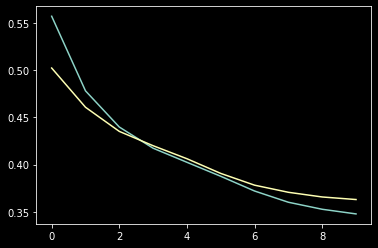

In [48]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) 

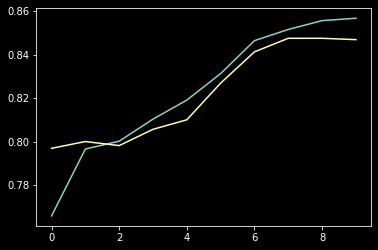

In [49]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy']) 